In [2]:
import ira
%alphalab dark

%run initlibs.py Lustre dark
from tools.loaders.data_loaders import load_data
from tools.charting.signals_charts import plot_entries

import qlearn as q
%run trackers.py
%run generators.py
%run indicators.py

Reloaded /usr/local/envs/ira_p36/lib/python3.6/site-packages/ira/experimental/c_simulator_core.pyx


In [23]:
spreads = {
   'AUS200': 15*0.1,
   'SPXM': 5*0.1,
   'XTIUSD': 5*0.01,
}

In [5]:
md = load_data('amp:SPXM', 'amp:AUS200', 'amp:XTIUSD', 'dukas:SPYUSD', 'dukas:BRENTUSD')

In [21]:
l0_spxm = q.gridsearch('Opt model', 
                       Lustre('1d', 12, 0.15, 50, 10), 
                       q.ReverseSignalsSharpeScoring(), 
                       md['SPXM'].ticks(),
                       {
                           'atr_period': [9, 12, 14, 24],
                           'mx': [0.5, 0.75, 1, 1.25],
                           'price_moving_period': [20, 50, 150],
                           'timeframe': ['1h', '1d', '1w'],
                           'vol_moving_period': [5,10,20] 
                        }, return_train_score=False, verbose=False);

In [34]:
l0_spxm.best_params_

{'SPXM': {'atr_period': 9,
  'mx': 1.25,
  'price_moving_period': 150,
  'timeframe': '1h',
  'vol_moving_period': 10}}

In [31]:
r_spxm = q.simulation({
    'T (SPY) / raw': [l0_spxm, q.FixedTrader(1, 0, 0)], 
    'T (SPY) / RAD 1': [l0_spxm, RADChandelier(1, '1h', 24, 2)], 
    'T (SPY) / RAD 2': [l0_spxm, RADChandelier(1, '1h', 24, 3)], 
    'T (SPY) / RAD 3': [l0_spxm, RADChandelier(1, '1h', 12, 2)], 
    'T (SPY) / RAD 4': [l0_spxm, RADChandelier(1, '1h', 12, 3)], 
    'T (SPY) / RAD 5': [l0_spxm, RADChandelier(1, '1h', 24, 1)], 
}, md['SPXM'].ohlcs('1h'), 'stock', 'Lustre SPXM', spreads=spreads)

 0: Lustre SPXM/T (SPY) / raw    : Sharpe: 0.87 | Sortino: 1.35 | CAGR: 29.10 | DD: $689.20 (31.47%) | Gain: $1125.80 | Execs: 129[OK]
 1: Lustre SPXM/T (SPY) / RAD 1  : Sharpe: 0.75 | Sortino: 1.32 | CAGR: 13.43 | DD: $344.30 (22.48%) | Gain: $450.70 | Execs: 369[OK]
 2: Lustre SPXM/T (SPY) / RAD 2  : Sharpe: -0.04 | Sortino: -0.07 | CAGR: -6.00 | DD: $685.90 (48.71%) | Gain: $-167.00 | Execs: 393[OK]
 3: Lustre SPXM/T (SPY) / RAD 3  : Sharpe: 0.25 | Sortino: 0.40 | CAGR: 3.14 | DD: $322.80 (23.85%) | Gain: $95.50 | Execs: 487[OK]
 4: Lustre SPXM/T (SPY) / RAD 4  : Sharpe: -0.10 | Sortino: -0.15 | CAGR: -9.18 | DD: $869.50 (61.45%) | Gain: $-247.40 | Execs: 423[OK]
 5: Lustre SPXM/T (SPY) / RAD 5  : Sharpe: 0.83 | Sortino: 1.54 | CAGR: 9.35 | DD: $128.20 (8.98%) | Gain: $301.90 | Execs: 190[OK]


,Name,sharpe,sortino,cagr,dd,dd_pct,gain,number_executions
0,Lustre SPXM/T (SPY) / raw,0.866367,1.345528,29.102606,689.2,31.470320,1125.8,129
1,Lustre SPXM/T (SPY) / RAD 1,0.745355,1.315383,13.429992,344.3,22.475357,450.7,369
2,Lustre SPXM/T (SPY) / RAD 2,-0.044745,-0.066946,-6.001333,685.9,48.707570,-167.0,393
3,Lustre SPXM/T (SPY) / RAD 3,0.246890,0.396221,3.137618,322.8,23.852804,95.5,487
4,Lustre SPXM/T (SPY) / RAD 4,-0.099618,-0.150547,-9.177991,869.5,61.453106,-247.4,423
5,Lustre SPXM/T (SPY) / RAD 5,0.828271,1.536631,9.347423,128.2,8.975705,301.9,190


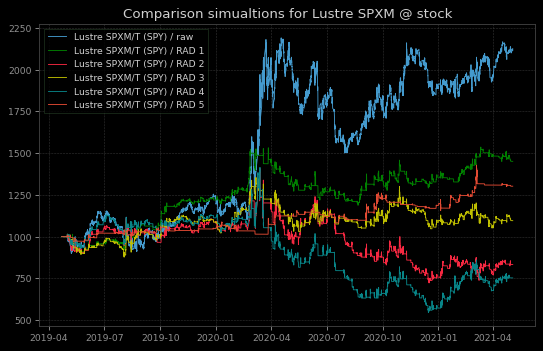

In [33]:
r_spxm.report(1000, commissions=0)